# <h1 align = 'center'>Project Data collection, Transmission and Security part 3</h1> 
#### <center> Marvel VS DC   </center>
#### <center> Achraf BELLA </center>
#### <center> Ecole Centrale - Casablanca - January 2022 </center>
***

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

from bokeh.palettes import Category20c
from bokeh.plotting import figure 
from bokeh.transform import cumsum
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column

from math import pi
import pandas as pd
import numpy as np
import json


# Data acquisition

In [12]:
marvel_usa = pd.read_pickle('marvel_data_usa_df.pkl')

In [13]:
marvel_europe = pd.read_pickle('marvel_data_europe_df.pkl')

In [14]:
DC_usa = pd.read_pickle('DC_data_usa_df.pkl')

In [15]:
DC_europe = pd.read_pickle('DC_data_europe_df.pkl')

In [16]:
print('shape of marvel europe data {}'.format(marvel_europe.shape))
print('shape of marvel usa data {}'.format(marvel_usa.shape))
print('shape of DC europe data {}'.format(DC_europe.shape))
print('shape of DC usa data {}'.format(DC_usa.shape))


shape of marvel europe data (5867, 13)
shape of marvel usa data (32391, 13)
shape of DC europe data (8774, 13)
shape of DC usa data (29062, 13)


### Word Cloud

In [17]:
wc = WordCloud(background_color="white", colormap="Dark2",  max_font_size=150, random_state=42)

data about marvel in europe


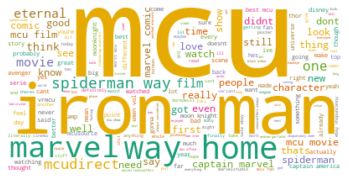

data about marvel in usa


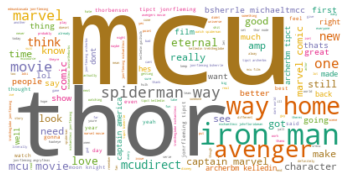

data about DC in europe


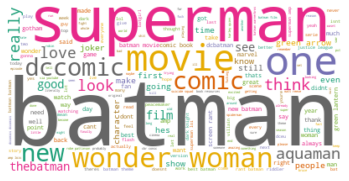

data about DC in usa


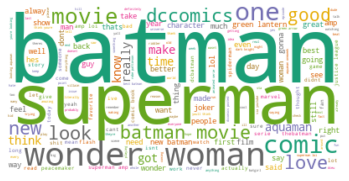

In [18]:
for df, data_location in zip([marvel_europe, marvel_usa, DC_europe, DC_usa],
              ['marvel in europe', 'marvel in usa', 'DC in europe', 'DC in usa']):
    print('data about {}'.format(data_location))
    corpus_chars_list = "\n".join(df.cleaned_tweet)
    wc.generate(corpus_chars_list)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

It makes sens that mean that we did a great job in data preparation.

In [19]:
def sentiments_analysis(tweet_data):
    """
    :param data: the list of tweets
    """
    polarity = 0
    positive = 0
    wpositive = 0
    spositive = 0
    negative = 0
    wnegative = 0
    snegative = 0
    neutral = 0
    nmb_tweets = len(tweet_data)
    
    for tweet in tweet_data:
        analysis = TextBlob(tweet)
        polarity += analysis.sentiment.polarity

        if (analysis.sentiment.polarity == 0):   
            neutral += 0
        elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
            wpositive += 1
        elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
            positive += 1
        elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
            spositive += 1
        elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
            wnegative += 1
        elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
            negative += 1
        elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
            snegative += 1
            pass
        pass
    
    dict_data = {'positive': positive, 'weakly postive':wpositive, 'strong postive':spositive,
            'negative': negative, 'weakly negative': negative, 'strong negative': snegative,
            'neutral': neutral}
    return dict_data


In [20]:
def bokeh_pie_char(sentiment_analysis):
    data = pd.Series(sentiment_analysis).reset_index(name='value').rename(columns={'index': 'sentiments'})
    data['angle'] = data['value']/data['value'].sum() * 2*pi
    data['color'] = Category20c[len(sentiment_analysis)]
    output_notebook()
    p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@sentiments: @value")
    p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='sentiments', source=data)
    p.axis.axis_label = None
    p.axis.visible = False
    p.grid.grid_line_color = None
    show(p)

In [21]:
bokeh_pie_char(sentiments_analysis(marvel_europe.cleaned_tweet))

Loading BokehJS ...

In [22]:
bokeh_pie_char(sentiments_analysis(marvel_usa.cleaned_tweet))

Loading BokehJS ...

In [23]:
bokeh_pie_char(sentiments_analysis(DC_europe.cleaned_tweet))

Loading BokehJS ...

In [24]:
bokeh_pie_char(sentiments_analysis(DC_usa.cleaned_tweet))

Loading BokehJS ...

# Polarity & subjectivity

In [25]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity 

In [26]:
for df in [marvel_europe, marvel_usa, DC_europe, DC_usa]:
    df['polarity'] = df['cleaned_tweet'].apply(pol)
    df['subjectivity'] = df['cleaned_tweet'].apply(sub)
    pass
pass 

In [27]:
def bokeh_sentiment(df):
    p = figure(width=800, height=400)
    # add a circle renderer with a size, color, and alpha
    p.circle(df.polarity, df.subjectivity  , size=5, color="navy", alpha=0.5)
    p.xaxis.axis_label = '<-- Negative -------- Positive -->'
    p.yaxis.axis_label = '<-- Facts -------- Opinions -->'

    # show the results
    show(p)

In [28]:
bokeh_sentiment(marvel_europe)

In [29]:
bokeh_sentiment(marvel_usa)

In [30]:
bokeh_sentiment(DC_europe)

In [31]:
bokeh_sentiment(DC_usa)

# HIstogram

In [32]:
def hist_plot(df):
    # Plot polarity and subjectivity histograms
    h_polar = figure(title="Polarity Distribution",tools="save", plot_width=500, plot_height=300)
    h_subj = figure(title="Subjectivity Distribution",tools="save", plot_width=500, plot_height=300)

    hist_polar, edges_polar = np.histogram(df['polarity'], density=True, bins=50)
    hist_subj, edges_subj = np.histogram(df['subjectivity'], density=True, bins=50)

    h_polar.quad(top=hist_polar, bottom=0, left=edges_polar[:-1], right=edges_polar[1:],
         fill_color="#036564", line_color="#033649",\
    )
    h_subj.quad(top=hist_subj, bottom=0, left=edges_subj[:-1], right=edges_subj[1:],
         fill_color="#036564", line_color="#033649",\
    )

    h_polar.legend.orientation = "top_left"
    h_polar.xaxis.axis_label = 'Polarity'
    h_polar.yaxis.axis_label = 'Dist'
    h_subj.legend.orientation = "top_left"
    h_subj.xaxis.axis_label = 'Subjectivity'
    h_subj.yaxis.axis_label = 'Dist'

    hist = column(h_polar, h_subj)

    return row(hist)

In [33]:
show(hist_plot(marvel_europe))

C:\Users\Supernova\anaconda3\lib\site-packages\bokeh\models\plots.py:815: UserWarning: 
You are attempting to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [34]:
show(hist_plot(marvel_usa))

In [35]:
show(hist_plot(DC_europe))

In [36]:
show(hist_plot(DC_usa))